In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, log_loss, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import ExtraTreesClassifier


import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
    

In [2]:

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )
test_id=df_test['music_id'] 


In [3]:
df_train.head()

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std,category
0,0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,...,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276,1
1,1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,...,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592,3
2,2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,...,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124,3
3,3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,...,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996,1
4,4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,...,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597,1


In [4]:
df_train.describe()
# Nous n'avons pas de valeur binaire ni de texte

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std,category
count,320.000000,317.000000,317.000000,317.000000,317.000000,318.000000,320.000000,318.000000,319.000000,316.000000,...,317.000000,319.000000,318.000000,316.000000,316.000000,320.000000,316.000000,316.000000,317.000000,320.000000
mean,159.500000,461.223799,727.558402,441.424764,664.515463,420.808596,606.042905,417.116685,605.835885,469.942682,...,0.629552,4.917406,28.050904,-0.155241,1.737679,1180.002741,1942.502831,192.060511,115.472340,1.500000
std,92.520268,302.890638,511.932682,286.127709,507.650090,284.887311,443.484753,269.444492,410.002545,319.000592,...,0.170709,2.537782,16.103779,0.185176,1.063592,711.314460,1984.500644,107.853027,53.495612,1.119785
min,0.000000,52.542076,108.190132,66.789970,129.553772,64.062683,117.359634,50.826832,93.769897,50.655052,...,0.405036,0.366504,1.656318,-0.650820,0.351351,21.491228,41.709451,35.199924,32.996641,0.000000
25%,79.750000,254.774170,388.372406,248.708359,350.873505,231.128601,344.294373,228.390095,353.000809,258.015579,...,0.515947,3.048645,16.354873,-0.287891,0.958037,687.719298,626.473435,114.992507,78.780289,0.750000
50%,159.500000,377.393036,571.490845,381.081177,534.109131,340.970337,484.871140,354.934341,505.056274,403.037384,...,0.583850,4.731231,24.205491,-0.086321,1.461911,1020.833333,1274.624056,167.636659,104.338107,1.500000
75%,239.250000,592.239685,910.419189,558.673584,803.034241,506.674622,752.747421,507.147308,702.858398,568.195679,...,0.683956,6.615188,37.958948,0.002296,2.144044,1552.741228,2634.940367,240.335595,142.303996,2.250000
max,319.000000,1643.472900,3421.152100,2172.719482,4360.215332,2302.835205,5054.364258,1829.826904,3210.021484,2502.509033,...,1.771815,14.466579,86.371120,0.074635,6.510337,5243.859649,15422.032531,579.817519,406.147341,3.000000


In [5]:
# Nous enlevons music_id de train et test car il n'est pas pertinent et nous gardons le résultat des catégories de train dans y
df_train.drop(['music_id'], axis=1, inplace=True)
df_test.drop(['music_id'], axis=1, inplace=True)
y = df_train.iloc[:, -1]

In [6]:
df_train.category.unique()

array([1, 3, 0, 2], dtype=int64)

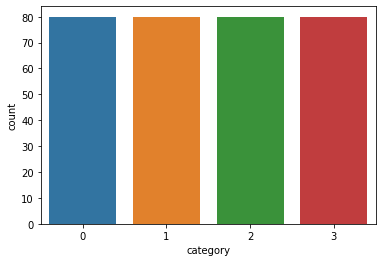

In [7]:
ax = sns.countplot(x="category", data=df_train)

In [8]:
df_train.isna().sum()

chroma_0_mean            3
chroma_0_std             3
chroma_10_mean           3
chroma_10_std            3
chroma_11_mean           2
                        ..
spectral_rolloff_mean    0
spectral_spread_mean     4
zcr_mean                 4
zcr_std                  3
category                 0
Length: 62, dtype: int64

In [9]:
#Nous remplacçons les valeurs NA via le KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_train= pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)

In [10]:
# Verification
df_train.isna().sum().sum()

0

In [11]:
df_train.head()

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std,category
0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,363.313141,...,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276,1.0
1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,6418.287109,...,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592,3.0
2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,396.768219,...,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124,3.0
3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,563.184021,...,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996,1.0
4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,225.814850,...,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597,1.0


In [12]:
# On drop category
df_train = df_train.drop(['category'],axis=1)

In [13]:
# On split les données 80/20
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state=42)

## Voici ci-dessous la liste des modèles que j'ai essayé

In [14]:
lgb = LGBMClassifier(random_state=40,n_estimators=100,objective ='multiclass',num_leaves=31,num_class=3)
lgb.fit(X_train, y_train)
u=lgb.predict(X_test)

print("LGBM Classifier accuracy : " , accuracy_score(u, y_test))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
u=neigh.predict(X_test)
print("KNeighborsClassifier accuracy : " , accuracy_score(u, y_test))

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("GradientBoostingClassifier accuracy : " , accuracy_score(u, y_test))

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)
u=LR.predict(X_test)
print("LogisticRegression accuracy : " , accuracy_score(u, y_test))

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

SVM = svm.SVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("SVC accuracy : " , accuracy_score(u, y_test))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
u=gnb.predict(X_test)
print("SVC accuracy : " , accuracy_score(u, y_test))

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

LGBM Classifier accuracy :  0.75
KNeighborsClassifier accuracy :  0.515625
RandomForestClassifier accuracy :  0.65625
GradientBoostingClassifier accuracy :  0.75


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression accuracy :  0.578125
LinearSVC accuracy :  0.546875
SVC accuracy :  0.484375
SVC accuracy :  0.609375


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomForestClassifier accuracy :  0.765625


## SCALING DES DATA : j'ai voulu appliquer un scalling sur chaque modèle pour voir quel scalling était le plus efficace et ensuite selectionner le meilleur score de tous les essais ( oui ça pique les yeux désolé!)
###  STANDARD SCALER :

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
######################

In [17]:
lgb = LGBMClassifier(random_state=40,n_estimators=100,objective ='multiclass',num_leaves=31,num_class=3)
lgb.fit(X_train, y_train)
u=lgb.predict(X_test)

print("LGBM Classifier accuracy : " , accuracy_score(u, y_test))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
u=neigh.predict(X_test)
print("KNeighborsClassifier accuracy : " , accuracy_score(u, y_test))

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("GradientBoostingClassifier accuracy : " , accuracy_score(u, y_test))

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)
u=LR.predict(X_test)
print("LogisticRegression accuracy : " , accuracy_score(u, y_test))

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

SVM = svm.SVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("SVC accuracy : " , accuracy_score(u, y_test))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
u=gnb.predict(X_test)
print("Gnb accuracy : " , accuracy_score(u, y_test))

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

LGBM Classifier accuracy :  0.71875
KNeighborsClassifier accuracy :  0.6875
RandomForestClassifier accuracy :  0.65625
GradientBoostingClassifier accuracy :  0.75
LogisticRegression accuracy :  0.765625
LinearSVC accuracy :  0.734375
SVC accuracy :  0.78125
Gnb accuracy :  0.625


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomForestClassifier accuracy :  0.765625


### MINMAXSCALER :

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#######################

In [20]:
lgb = LGBMClassifier(random_state=40,n_estimators=100,objective ='multiclass',num_leaves=31,num_class=3)
lgb.fit(X_train, y_train)
u=lgb.predict(X_test)

print("LGBM Classifier accuracy : " , accuracy_score(u, y_test))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
u=neigh.predict(X_test)
print("KNeighborsClassifier accuracy : " , accuracy_score(u, y_test))

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("GradientBoostingClassifier accuracy : " , accuracy_score(u, y_test))

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)
u=LR.predict(X_test)
print("LogisticRegression accuracy : " , accuracy_score(u, y_test))

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

SVM = svm.SVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("SVC accuracy : " , accuracy_score(u, y_test))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
u=gnb.predict(X_test)
print("Gnb accuracy : " , accuracy_score(u, y_test))

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

LGBM Classifier accuracy :  0.75
KNeighborsClassifier accuracy :  0.703125
RandomForestClassifier accuracy :  0.65625
GradientBoostingClassifier accuracy :  0.75
LogisticRegression accuracy :  0.765625
LinearSVC accuracy :  0.796875
SVC accuracy :  0.75
Gnb accuracy :  0.625
RandomForestClassifier accuracy :  0.765625


### RobustScaler :

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state=42)

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
lgb = LGBMClassifier(random_state=40,n_estimators=100,objective ='multiclass',num_leaves=31,num_class=3)
lgb.fit(X_train, y_train)
u=lgb.predict(X_test)

print("LGBM Classifier accuracy : " , accuracy_score(u, y_test))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
u=neigh.predict(X_test)
print("KNeighborsClassifier accuracy : " , accuracy_score(u, y_test))

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("GradientBoostingClassifier accuracy : " , accuracy_score(u, y_test))

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
LR.fit(X_train, y_train)
u=LR.predict(X_test)
print("LogisticRegression accuracy : " , accuracy_score(u, y_test))

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
u=gnb.predict(X_test)
print("Gnb accuracy : " , accuracy_score(u, y_test))

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
u=clf.predict(X_test)
print("RandomForestClassifier accuracy : " , accuracy_score(u, y_test))

LGBM Classifier accuracy :  0.734375
KNeighborsClassifier accuracy :  0.6875
RandomForestClassifier accuracy :  0.65625
GradientBoostingClassifier accuracy :  0.75
LogisticRegression accuracy :  0.765625
LinearSVC accuracy :  0.703125
Gnb accuracy :  0.625


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomForestClassifier accuracy :  0.765625


## Les résultats sont sensiblement meilleurs avec le scalling MinMaxScaler. Pour la suite je vais travailler sur le meilleur résultat : le modèl LinearSVC

### Pour améliorer ces données je vais voir si il y a des outliers, (effectivement cette étape de preprocessing aurait dû avoir lieu avant)

In [24]:
x = df_train
y = y.to_frame()

In [25]:
# Suprresion des outliers en dessous du first et au dessus du third quartile
def outlier_function(df_train, col_name):
    first_quartile = np.percentile(np.array(df_train[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_train[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    
    valeur = []
    for value in df_train[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
            valeur.append(value)
    return lower_limit, upper_limit, outlier_count, valeur

In [26]:
for i in x.columns:
    if outlier_function(x, i)[2] > 0:
        print("Il y a {} outliers dans {}".format(outlier_function(x, i)[2], i))

Il y a 3 outliers dans chroma_0_mean
Il y a 4 outliers dans chroma_0_std
Il y a 2 outliers dans chroma_10_mean
Il y a 7 outliers dans chroma_10_std
Il y a 4 outliers dans chroma_11_mean
Il y a 4 outliers dans chroma_11_std
Il y a 3 outliers dans chroma_1_mean
Il y a 5 outliers dans chroma_1_std
Il y a 5 outliers dans chroma_2_mean
Il y a 5 outliers dans chroma_2_std
Il y a 4 outliers dans chroma_3_mean
Il y a 9 outliers dans chroma_3_std
Il y a 2 outliers dans chroma_4_mean
Il y a 8 outliers dans chroma_4_std
Il y a 3 outliers dans chroma_5_mean
Il y a 7 outliers dans chroma_5_std
Il y a 2 outliers dans chroma_6_mean
Il y a 4 outliers dans chroma_6_std
Il y a 1 outliers dans chroma_7_mean
Il y a 7 outliers dans chroma_7_std
Il y a 5 outliers dans chroma_8_mean
Il y a 3 outliers dans chroma_8_std
Il y a 2 outliers dans chroma_9_mean
Il y a 7 outliers dans chroma_9_std
Il y a 2 outliers dans chroma_centroid_mean
Il y a 1 outliers dans chroma_flux_mean
Il y a 3 outliers dans chroma_max
Il

In [27]:
# Suppression des outliers
listeindexdrop = []
for i in x.columns:
    if outlier_function(x, i)[2] > 0:
        #print("Il y a {} outliers dans {}".format(outlier_function(x, i)[2], i))
        liste_outlier= outlier_function(x, i)[3]
        for j in x[i].values:
            if j in liste_outlier:
                listeindexdrop.append(x.loc[x[i]==j].index[0])
len(listeindexdrop)#152
listeindexdrop = list(set(listeindexdrop))
len(listeindexdrop)#64
listeindexdrop.sort()
id=0
for i in listeindexdrop:
    x.drop(x.index[i-id], inplace=True)
    y.drop(y.index[i-id], inplace=True)
    id = id+1

In [28]:
#Resplit oui, c'est pas top de le refaire 20 fois dans le même notebook
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

LinearSVC accuracy :  0.9038461538461539


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
# Matrice de confusion
cf_matrix=confusion_matrix(u,y_test)
print(cf_matrix)

[[13  0  0  0]
 [ 0 11  1  2]
 [ 0  1 17  1]
 [ 0  0  0  6]]


<AxesSubplot:>

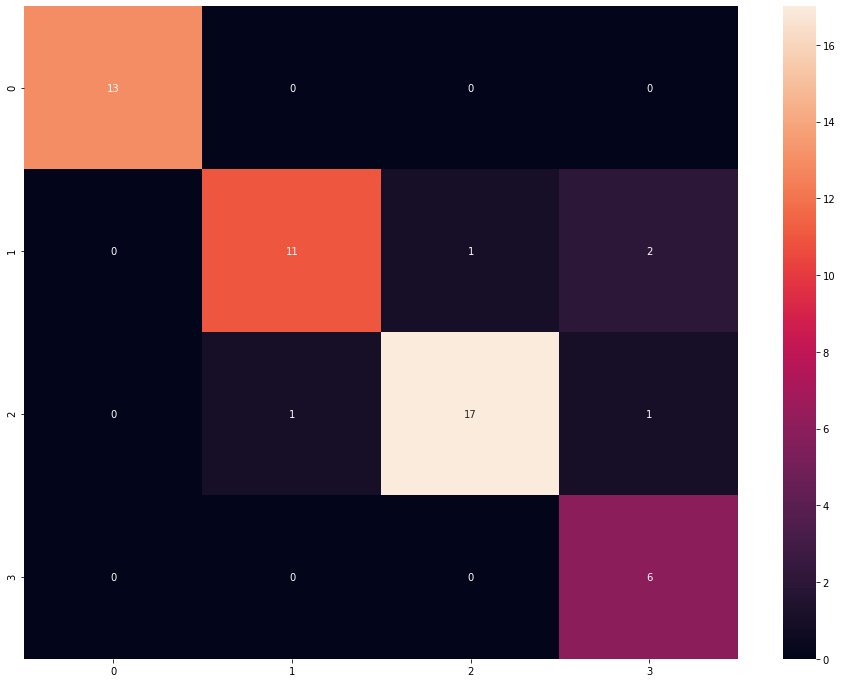

In [32]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(cf_matrix,annot=True)

### Essayons de faire une pca pour améliorer nos performances 

In [33]:
x_pca=x.copy()

In [34]:
x_pca.head()

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,563.184021,...,0.257047,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996
5,623.636475,1185.141235,356.477631,438.765228,436.773651,584.193237,519.140076,607.874695,886.185425,1343.947998,...,-0.179700,0.817544,4.731231,33.695191,0.006474,1.644274,1310.964912,753.759663,179.852651,88.762234
6,202.341812,289.642334,154.299088,197.096191,175.142578,296.743988,127.823761,150.595825,95.901791,348.950867,...,0.113059,0.497695,3.298534,7.437169,-0.525607,0.579028,214.912281,544.688458,109.475711,37.981397
8,256.068146,419.610474,154.441422,241.447266,192.383408,342.736816,191.470200,264.553986,184.699219,299.975769,...,0.042138,0.486629,4.233308,10.201029,-0.470241,1.461510,537.280702,1069.792914,135.532742,81.179168
9,681.930420,1243.771484,637.555603,874.287659,621.384094,916.178772,472.486176,832.650085,394.936432,772.421143,...,0.273687,0.601287,5.264327,17.964051,0.002828,1.918716,580.263158,358.190976,113.107438,68.767890


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)   # j'ai essayé jusqu'à 60 et je n'obtients jamais de meilleure performance 
principle=pca.fit_transform(x_pca)

In [36]:
x_pca=pd.DataFrame(data=principle)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,14064.259603,514.266145,-325.803994,-63.376128,-357.821408,-210.141331,-312.438893,88.696606,-445.246476,580.525734,...,-1.030434,0.728399,-0.143421,-0.793554,-0.378046,-0.464588,0.119469,0.180675,-0.494249,-0.288920
1,25454.047117,1190.543640,-1835.159398,-23.378046,-336.144860,-229.225797,1195.095406,-418.199195,559.987933,-74.563497,...,-8.122001,4.603978,1.389146,0.173329,0.460852,-0.164300,-0.155195,-0.020872,-0.291394,0.241224
2,-3267.476507,-2216.915052,-686.693067,-365.978922,-231.475473,-152.139375,152.671564,-58.999651,43.352518,239.211782,...,2.536954,3.216567,0.319423,-1.031716,-0.138238,0.082606,0.216515,-0.325003,-0.333537,-0.038838
3,-5814.810648,-1530.758594,288.514980,-81.920352,-290.085061,314.329992,-236.115633,-211.113309,200.956667,52.374637,...,4.208008,-4.651244,-0.702322,0.196303,-0.832384,0.396106,0.167777,0.292370,-0.085019,-0.273692
4,166.396060,-1195.082446,1549.819877,40.747060,-279.830633,-791.614020,-336.995378,221.072488,-191.009940,-19.531034,...,0.508889,-3.326716,-0.030346,0.520138,-0.458557,-0.533286,-0.053051,-0.116242,0.001515,0.055960


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y,test_size=0.2,random_state=42)

In [38]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

LinearSVC accuracy :  0.6923076923076923


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## La pca ne nous a pas aidé sur la performance du model, nous allons donc continuer à chercher comment améliorer ce score
### Je vais chercher comment ameliorer les paramêtres de mon model
D'après la documentation sklearn nous pouvons changer plusieurs paramètres :
- Penalty : 'l1' ou 'l2'  l1 est utilisé si nos vectors sont sparse ce qui n'est pas le cas ici
- loss : spécifie la fonction loss : hinge ou squared_hinge, nous avons un meilleur résultat avec squared_hinge
- dual : booleen, False si nous avons + de données que de features, ce qui est le cas ici
- tol : Tolérance pour les critères d'arret. A partir >0.1 nous n'arrivons pas à augmenter la performance 
- multi_class : 'ovr' ou 'crammer_singer', nous avons + de 2 classes donc nous choississons 'ovr'
- fit_intercept booleen : Indique si il faut calculer l'intersection, ici rien n'améliore
- random_state : inutile
- max_iter : à partir de 15 nous avons notre performance maximale



In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
SVM = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=False, 
                    tol=0.1, multi_class='ovr', fit_intercept=False, max_iter=15, C=1)
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

LinearSVC accuracy :  0.9038461538461539


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


------ TRAINING ACCURACY -------
0.9656862745098039
------ TRAINING F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 0.9791666666666666
PRECISION SUR LA CATEGORIE 1 = 0.9565217391304347
PRECISION SUR LA CATEGORIE 2 = 0.9642857142857143
PRECISION SUR LA CATEGORIE 3 = 0.9647058823529412
------ VALIDATION ACCURACY -------
0.9038461538461539
------ VALIDATION F-SCORE -------
PRECISION SUR LA CATEGORIE 0 = 1.0
PRECISION SUR LA CATEGORIE 1 = 0.8461538461538461
PRECISION SUR LA CATEGORIE 2 = 0.918918918918919
PRECISION SUR LA CATEGORIE 3 = 0.8


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(33.0, 0.5, 'Réel')

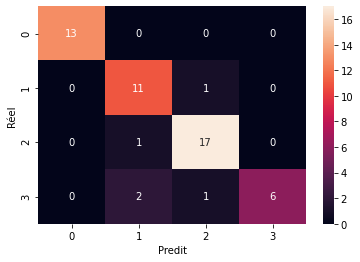

In [42]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(svm.LinearSVC())
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



print('------ TRAINING ACCURACY -------')
print(accuracy_score(y_train, y_train_predict))


print('------ TRAINING F-SCORE -------')
classes = f1_score(y_train, y_train_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))


print('------ VALIDATION ACCURACY -------')
print(accuracy_score(y_test, y_test_predict))

print('------ VALIDATION F-SCORE -------')
classes = f1_score(y_test, y_test_predict, average=None)

for (cat, score) in enumerate(classes):
    print('PRECISION SUR LA CATEGORIE ' + str(cat) + ' = ' + str(score))

cm_val = confusion_matrix(y_test, y_test_predict)
heatmap_val = sns.heatmap(cm_val, annot=True)

heatmap_val.set_xlabel('Predit')
heatmap_val.set_ylabel('Réel')

##  Nous cherchons une selection des features pour notre model LinearSvc

In [43]:
x_scaled=x.copy() #on copie nos données scallées

In [44]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.3, penalty="l2", dual=False).fit(x_scaled, y)
model = SelectFromModel(lsvc, prefit=True)
feature_idx = model.get_support()
feature_name = x_scaled.columns[feature_idx]

x_features_selected = model.transform(x_scaled)

x_features_selected = pd.DataFrame(x_features_selected, columns=feature_name)

x_features_selected.shape
x_features_selected

c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,chroma_centroid_mean,chroma_spread_mean,mfcc_10_std,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,mfcc_2_mean,mfcc_2_std,...,mfcc_6_std,mfcc_7_mean,mfcc_7_std,mfcc_8_mean,mfcc_8_std,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_decrease_mean,spectral_flux_mean
0,5.748345,11.268784,0.500206,0.539651,-0.138668,0.613281,0.031876,0.533558,0.131419,1.178031,...,0.733236,0.962989,0.560574,-0.014520,0.685316,0.257047,0.702976,4.064860,-0.287745,2.207420
1,5.233812,10.372887,0.635126,0.680836,-0.063558,0.610217,-0.178287,0.613811,-0.173151,0.765720,...,0.606939,0.375948,0.578541,-0.406359,0.736854,-0.179700,0.817544,4.731231,0.006474,1.644274
2,5.692751,11.302124,0.476492,0.542412,-0.006443,0.607704,0.041675,0.632535,-0.162674,0.926109,...,0.417751,0.550384,0.464843,0.105837,0.487410,0.113059,0.497695,3.298534,-0.525607,0.579028
3,5.197120,8.904299,0.535092,0.502324,0.236872,0.541141,0.061972,0.563608,0.244944,1.115820,...,0.629603,0.332233,0.533052,0.132123,0.616916,0.042138,0.486629,4.233308,-0.470241,1.461510
4,5.841007,10.379212,0.515122,0.490599,-0.041908,0.464458,0.066722,0.481300,-0.018802,0.882304,...,0.660254,0.565432,0.749337,-0.083488,0.590379,0.273687,0.601287,5.264327,0.002828,1.918716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,5.929152,9.513753,0.748362,0.790134,0.025183,0.670908,-0.062463,0.679653,-0.160265,0.756185,...,0.589475,0.138063,0.663172,0.285155,0.708033,-0.226337,0.682789,4.231453,-0.181232,0.868810
252,5.821501,8.679995,0.761179,0.749808,0.105986,0.879557,-0.261431,0.644497,-0.306386,0.920233,...,0.779780,0.275190,0.723163,-0.282397,0.642668,0.127569,0.676786,2.665482,-0.173625,0.970722
253,6.184446,8.700215,0.573469,0.474020,0.289555,0.545385,0.080888,0.526374,0.254336,1.200981,...,0.714500,0.433145,0.703136,0.402846,0.773200,0.056780,0.538871,3.031986,-0.255245,1.293797
254,5.314267,10.165566,0.514722,0.450348,-0.091104,0.448779,-0.268272,0.539432,-0.128603,0.715080,...,0.632480,0.287577,0.553505,0.074840,0.513010,0.094162,0.540750,7.696579,0.015666,1.431960


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_features_selected, y,test_size=0.2,random_state=42)

In [46]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

LinearSVC accuracy :  0.8269230769230769


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## La selection de features avec un C de 0.3 nous a selectionné 27 colonnes et ne nous a pas aidé à améliorer nos performances

## Notre résultat final est donc 0.9038461538461539

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
u=SVM.predict(X_test)
print("LinearSVC accuracy : " , accuracy_score(u, y_test))

LinearSVC accuracy :  0.9038461538461539


c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [50]:
u

array([0, 3, 2, 2, 1, 0, 2, 2, 3, 1, 3, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 3, 3, 2, 1, 2, 0, 2, 2, 2, 2, 3, 1,
       0, 0, 1, 1, 0, 2, 1, 2], dtype=int64)

In [51]:
df_test

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,232.907440,350.553833,206.571701,331.046967,225.048828,347.441132,221.465195,332.978180,224.200668,347.038422,...,-0.138428,0.572161,8.366616,56.939299,0.046856,1.796432,472.807018,2692.618591,163.125244,115.239277
1,342.126831,615.817993,447.988678,562.143860,413.652649,633.503174,432.197021,668.721008,359.124786,426.877014,...,0.132142,0.684787,4.198134,23.288761,-0.022325,1.785995,1310.964912,1230.997277,170.899800,113.006177
2,92.768356,232.246658,152.421188,268.086456,79.888550,135.265106,75.790894,156.143219,148.015030,304.408112,...,-0.225053,0.602654,0.866282,20.381682,-0.263736,0.476780,1031.578947,1006.524430,81.420967,69.912374
3,219.882584,410.804382,199.726151,305.265564,452.057037,1210.232788,321.175476,815.782837,408.686401,698.333984,...,-0.261579,0.970925,1.965793,32.093015,-0.157930,0.866502,1332.456140,912.472403,148.232375,65.696249
4,215.454269,306.737244,259.520355,343.783783,305.393311,368.144043,238.357651,349.670929,203.332275,340.900879,...,-0.130924,0.526003,4.298090,59.155876,-0.025128,1.741103,1482.894737,4637.320310,225.845447,110.317563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,378.110657,910.296631,411.037994,738.624512,474.921844,1271.251221,370.271271,974.712097,224.349991,471.294678,...,0.543129,0.572005,2.099067,12.647468,-0.208215,1.337591,838.157895,304.780476,83.854556,86.154190
76,298.790619,838.457458,289.558838,651.673340,285.266571,NaN,220.631119,451.879761,316.052155,772.024902,...,0.024739,0.658864,3.098623,9.447293,-0.562238,1.568547,322.368421,1445.712302,192.579308,185.982475
77,340.823334,581.847351,229.372055,268.090668,237.591629,272.746857,344.910767,481.311584,325.790955,439.735168,...,0.337493,0.447563,5.530875,5.660125,-0.490255,0.952766,128.947368,505.899176,111.885235,75.096457
78,461.047760,662.166565,NaN,593.540649,493.840912,541.830078,508.564453,568.137085,1304.457153,1389.750732,...,-0.117043,0.470288,6.186056,33.860030,0.005855,1.481684,1418.421053,1286.331697,233.868235,129.624790


## Ce que j'aurais souhaité faire avec plus de temps : 
#### - Tester mes performances si je change la proportion du jeu de test, ici nous prenons 80% de 256 lignes pour nous entrainer, peux-etre qu'avec 90 voir 95 % nous aurons des mauvaises performances sur le jeu de train mais de meilleures sur celui de test
#### - Retirer moins d'outliers pour avoir plus de données

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state=42)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)

c:\users\louis\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC()

In [55]:
#Nous remplacçons les valeurs NA via le KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_test= pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)

In [56]:
df_test = scaler.transform(df_test)

In [57]:
test_predictions = SVM.predict(df_test)
test_predictions

array([2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 2, 1, 2, 0, 0, 1, 1, 0, 0, 3, 3, 2, 3, 2, 1,
       3, 1, 1, 0, 3, 0, 3, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 2, 0, 3, 1, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 3, 0, 3], dtype=int64)

In [58]:
solutions = pd.DataFrame({'music_id': test_id, 'category': test_predictions})
solutions.to_csv('C:/Users/Louis/Desktop/ML_Elective.csv',index=False)